<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/11-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar Máquinas de soporte vectorial (SVM) en Python.



Los paquetes necesarios son:

In [1]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo SVC
from sklearn.svm import SVC

---
## <font color='264CC7'> Ejemplo </font>

En el siguiente código, se muestra un ejemplo de cómo implementar Máquinas de soporte vectorial (SVM) en Python. Primero carguemos los datos y analicemos su estructura.

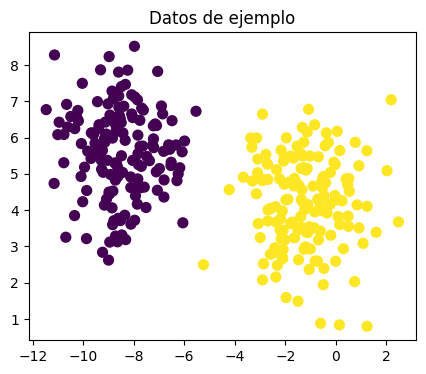

In [ ]:
# Generamos los datos
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.3, random_state=7)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.title('Datos de ejemplo')
plt.show()


Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el modelo:

In [ ]:
# Crear y entrenar el modelo SVM
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

SVC(kernel='linear')

Revisamos la precisión del modelo:

In [ ]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 1.0
Matriz de confusión:
[[31  0]
 [ 0 29]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Podemos visualizar las regiones de decisión del modelo:

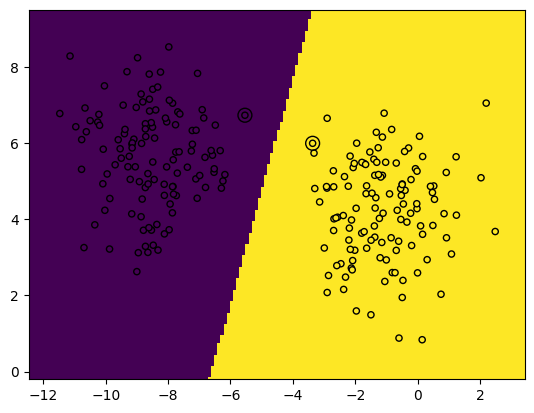

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np

# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Aumenta la disperción de los datos de entrenamiento y observa cómo cambia la precisión del modelo.
</div>
</br>
<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Aumenta el número de centros de los datos de entrenamiento y observa cómo cambia la visualización de las regiones de decisión.
</div>

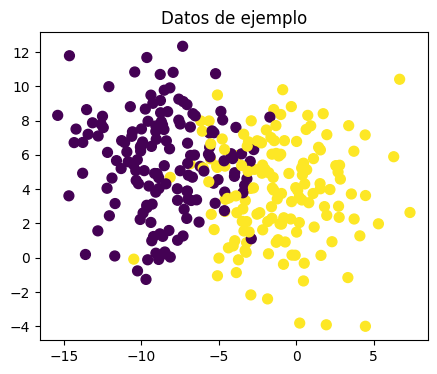

In [6]:
# Generamos los datos
X, y = make_blobs(n_samples=300, centers=2, cluster_std=3, random_state=7)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.title('Datos de ejemplo')
plt.show()


In [7]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Crear y entrenar el modelo SVM
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.82
Matriz de confusión:
[[27  4]
 [ 7 22]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.85      0.76      0.80        29

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



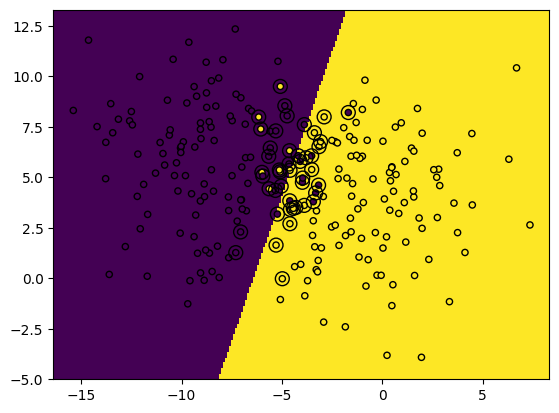

In [10]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np

# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

ejercicio

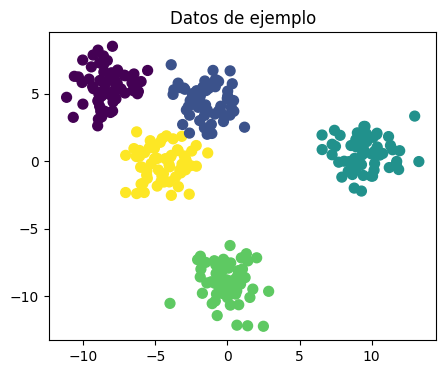

In [13]:
# Generamos los datos
X, y = make_blobs(n_samples=300, centers=5, cluster_std=1.3, random_state=7)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.title('Datos de ejemplo')
plt.show()


In [14]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Crear y entrenar el modelo SVM
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 1.0
Matriz de confusión:
[[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 13]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



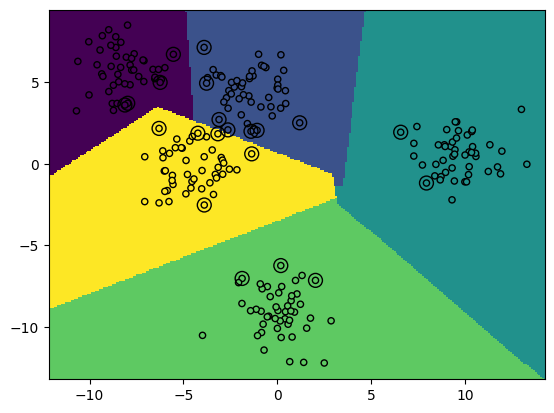

In [17]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np

# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

---
## <font color='264CC7'> Kernel </font>

Revisemos datos que no son linealmente separables:

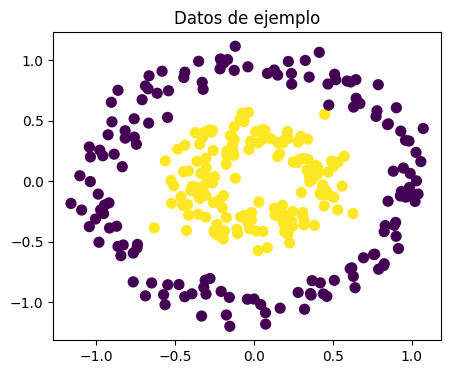

In [32]:
# Generamos los datos
X, y = make_circles(n_samples=300, factor=.4, noise=0.1, random_state=7)

# Visualizar los datos
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.title('Datos de ejemplo')
plt.show()

Realicemos el mismo procedimiento que antes:

In [20]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.57
Matriz de confusión:
[[11 21]
 [ 5 23]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.52      0.82      0.64        28

    accuracy                           0.57        60
   macro avg       0.61      0.58      0.55        60
weighted avg       0.61      0.57      0.54        60



Visualicemos las regiones de decisión:

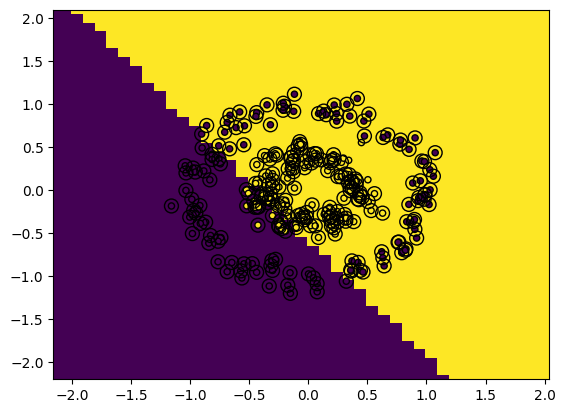

In [21]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

Apliquemos un kernel rbf:

In [24]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
modelo = SVC(kernel='rbf', degree=3)
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.98
Matriz de confusión:
[[32  0]
 [ 1 27]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Visualicemos las regiones de decisión:

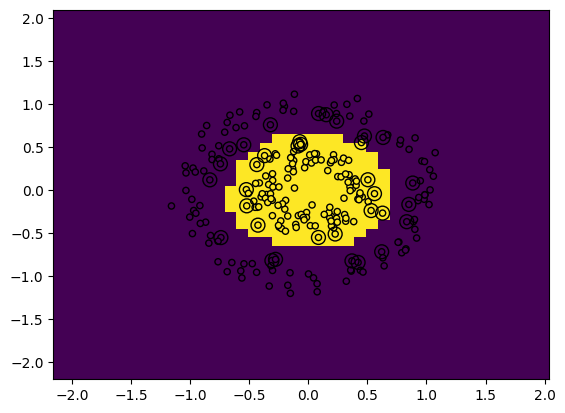

In [23]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Pruébalo con un kernel polinómico de grado 2 y 3, y observa cómo cambia la visualización de las regiones de decisión.
</div>
</br>
<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Genera datos con la función make_moons y observa cómo cambia la visualización de las regiones de decisión con diferentes kernels.
</div>
</br>
<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Para un conjunto de datos no linealmente separable, prueba un kernel polinomial con diferentes grados; realiza un gráfico de la precisión del modelo en función del grado del kernel.
</div>

In [33]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
modelo = SVC(kernel='poly', degree=3)
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.53
Matriz de confusión:
[[ 4 28]
 [ 0 28]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22        32
           1       0.50      1.00      0.67        28

    accuracy                           0.53        60
   macro avg       0.75      0.56      0.44        60
weighted avg       0.77      0.53      0.43        60



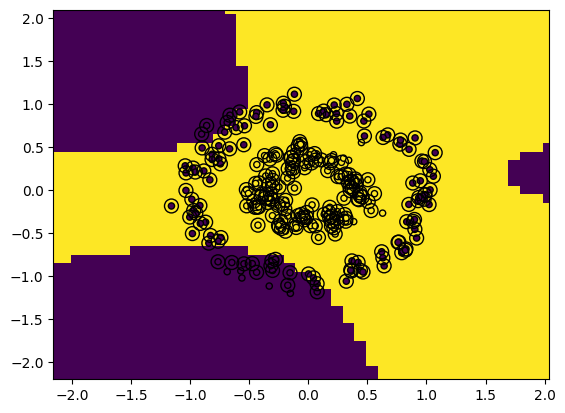

In [34]:
# Datos para el fondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                         np.arange(y_min, y_max, 0.1))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

# Crear el fondo
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

# Puntos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Soporte de los vectores
sv = modelo.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [ ]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
0,Bulbasaur,49,49,45,65,65,45,1
1,Ivysaur,62,63,60,80,80,60,2
2,Venusaur,82,83,80,100,100,80,3
3,Charmander,52,43,65,60,50,39,1
4,Charmeleon,64,58,80,80,65,58,2


Revisemos los datos:

In [ ]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921,1.582781
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117,0.676832
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000,1.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000,1.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000,1.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000,2.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000,3.000000


Escalemos los datos:

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])

### <font color='264CC7'> Determinación del valor del kernel </font>

Para determinar el mejor valor de kernel, iteramos sobre los valores posibles y calculamos la precisión del modelo:

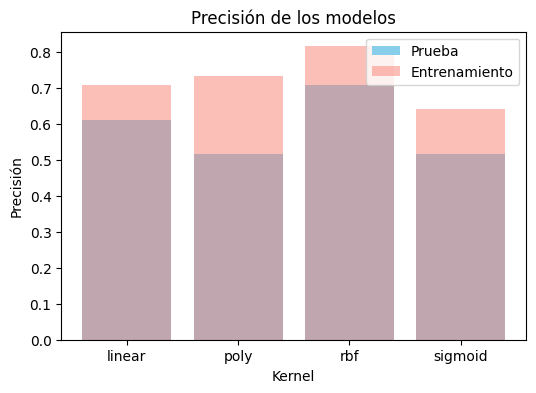

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data['Stage'], test_size=0.2, random_state=42, stratify=data['Stage'])

# Determinar el mejor valor de k
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

# Precisión de los modelos
precisions_test = []
precisions_train = []

for kernel in kernel_values:
    modelo = SVC(kernel=kernel)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k con barras
plt.figure(figsize=(6, 4))
plt.bar(kernel_values, precisions_test, color='skyblue')
plt.bar(kernel_values, precisions_train, color='salmon', alpha=0.5)
plt.title('Precisión de los modelos')
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.legend(['Prueba', 'Entrenamiento'])
plt.show()


Parece que el kernel rbf es el mejor.

### <font color='264CC7'> Modelo SVM </font>

Generemos el modelo con el kernel seleccionado:

In [ ]:
# Realizamos el agrupamiento
modelo = SVC(kernel='rbf')
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.71
Matriz de confusión:
[[11  5  0]
 [ 1 11  0]
 [ 0  3  0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.92      0.69      0.79        16
           2       0.58      0.92      0.71        12
           3       0.00      0.00      0.00         3

    accuracy                           0.71        31
   macro avg       0.50      0.53      0.50        31
weighted avg       0.70      0.71      0.68        31



c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

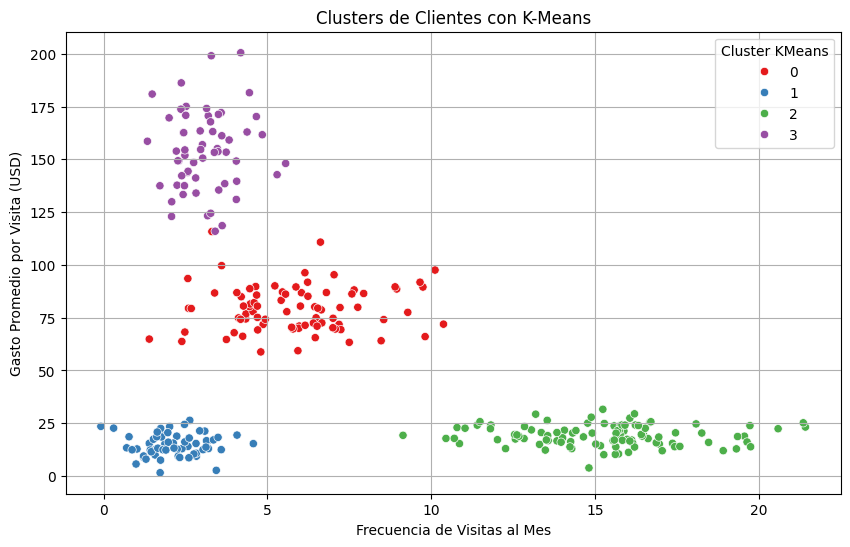

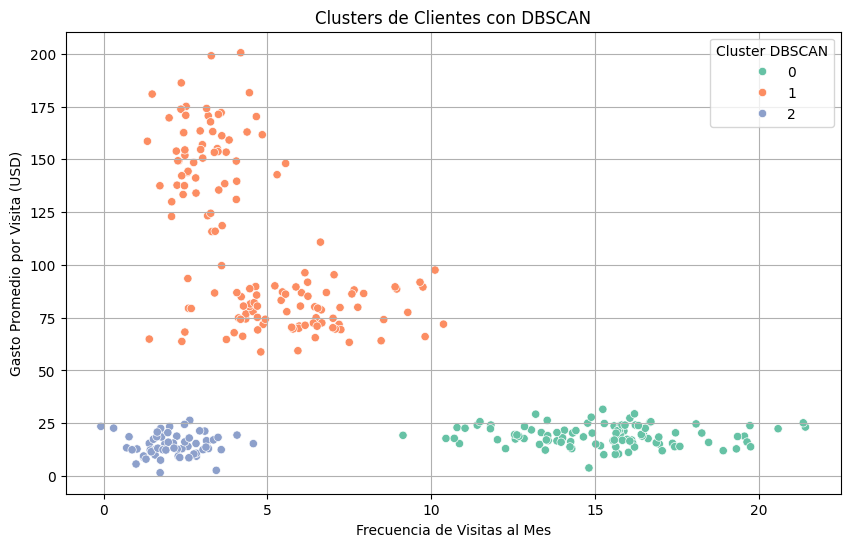

,Frecuencia_Visitas,Gasto_Por_Visita,Edad,Cluster_KMeans,Cluster_DBSCAN
0,16.490142,19.308678,21.295377,2,0
1,19.569090,18.829233,19.531726,2,0
2,19.737638,23.837174,19.061051,2,0
3,16.627680,17.682912,19.068540,2,0
4,15.725887,10.433599,16.550164,2,0


In [3]:
# Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Paso 2: Crear datos artificiales de clientes
np.random.seed(42)

# Definir 4 perfiles de clientes
estudiantes = np.random.normal(loc=[15, 20, 20], scale=[3, 5, 2], size=(100, 3))  # Van mucho, gastan poco, jóvenes
profesionales = np.random.normal(loc=[6, 80, 35], scale=[2, 10, 5], size=(80, 3))  # Visitan medio, gastan medio, adultos
adultos_mayores = np.random.normal(loc=[2, 15, 65], scale=[1, 5, 3], size=(60, 3)) # Visitan poco, gastan poco, mayores
familias = np.random.normal(loc=[3, 150, 40], scale=[1, 20, 5], size=(60, 3))      # Van poco, gastan alto, edad media

# Unir todos los clientes
X = np.vstack((estudiantes, profesionales, adultos_mayores, familias))

# Crear DataFrame
clientes_df = pd.DataFrame(X, columns=['Frecuencia_Visitas', 'Gasto_Por_Visita', 'Edad'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clientes_df[['Frecuencia_Visitas', 'Gasto_Por_Visita', 'Edad']])

# Paso 3: Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clientes_df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Paso 4: Aplicar DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
clientes_df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Paso 5: Visualizar gráfico de K-Means
plt.figure(figsize=(10,6))
sns.scatterplot(data=clientes_df, x='Frecuencia_Visitas', y='Gasto_Por_Visita', hue='Cluster_KMeans', palette='Set1')
plt.title('Clusters de Clientes con K-Means')
plt.xlabel('Frecuencia de Visitas al Mes')
plt.ylabel('Gasto Promedio por Visita (USD)')
plt.legend(title='Cluster KMeans')
plt.grid(True)
plt.show()

# Paso 6: Visualizar gráfico de DBSCAN
plt.figure(figsize=(10,6))
sns.scatterplot(data=clientes_df, x='Frecuencia_Visitas', y='Gasto_Por_Visita', hue='Cluster_DBSCAN', palette='Set2')
plt.title('Clusters de Clientes con DBSCAN')
plt.xlabel('Frecuencia de Visitas al Mes')
plt.ylabel('Gasto Promedio por Visita (USD)')
plt.legend(title='Cluster DBSCAN')
plt.grid(True)
plt.show()

# (Opcional) Mostrar primeras filas de datos
clientes_df.head()


In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Crear datos artificiales de clientes
np.random.seed(42)

# Definir 4 perfiles de clientes
estudiantes = np.random.normal(loc=[15, 20, 20], scale=[3, 5, 2], size=(100, 3))
profesionales = np.random.normal(loc=[6, 80, 35], scale=[2, 10, 5], size=(80, 3))
adultos_mayores = np.random.normal(loc=[2, 15, 65], scale=[1, 5, 3], size=(60, 3))
familias = np.random.normal(loc=[3, 150, 40], scale=[1, 20, 5], size=(60, 3))

# Unir todos los clientes
X = np.vstack((estudiantes, profesionales, adultos_mayores, familias))

# Crear DataFrame
clientes_df = pd.DataFrame(X, columns=['Frecuencia_Visitas', 'Gasto_Por_Visita', 'Edad'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clientes_df[['Frecuencia_Visitas', 'Gasto_Por_Visita', 'Edad']])

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clientes_df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
clientes_df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Exportar a CSV para Power BI
clientes_df.to_csv('clientes_clusters.csv', index=False)

clientes_df.head()


,Frecuencia_Visitas,Gasto_Por_Visita,Edad,Cluster_KMeans,Cluster_DBSCAN
0,16.490142,19.308678,21.295377,2,0
1,19.569090,18.829233,19.531726,2,0
2,19.737638,23.837174,19.061051,2,0
3,16.627680,17.682912,19.068540,2,0
4,15.725887,10.433599,16.550164,2,0


In [38]:
# Importar librerías necesarias
from __future__ import annotations

import math
import sys
from io import BytesIO
from typing import List

import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Configuración
N_POINTS_NORMAL = 1500  # MÁS datos normales
N_POINTS_FRAUDE = 300   # MÁS fraudes (ruido)
COLORS = ["#3498db", "#2ecc71", "#f1c40f", "#9b59b6", "#e67e22", "#1abc9c", "#9b59b6", "#34495e"]
EPSILON = sys.float_info.epsilon

# Clases
class Point:
    def __init__(self, x: float, y: float, color="grey", magnitude=20):
        self.x = x
        self.y = y
        self.color = color
        self.magnitude = magnitude

    def distance_to_point(self, point: Point):
        delta_x = self.x - point.x
        delta_y = self.y - point.y
        return math.sqrt(delta_x ** 2 + delta_y ** 2)

class PointList:
    def __init__(self, points: List[Point] = None, marker: str = "x"):
        self.points = points if points else []
        self.marker = marker

    @property
    def x_values(self):
        return [point.x for point in self.points]

    @property
    def y_values(self):
        return [point.y for point in self.points]

    @property
    def colors(self):
        return [point.color for point in self.points]

    @property
    def magnitudes(self):
        return [point.magnitude for point in self.points]

    def plot(self):
        return plt.scatter(
            x=self.x_values,
            y=self.y_values,
            color=self.colors,
            marker=self.marker,
            s=self.magnitudes
        )

    def append(self, point):
        self.points.append(point)

    def len(self):
        return len(self.points)

def random_normal_point():
    # Datos normales: agrupaciones claras
    center_options = [(0.25, 0.25), (0.75, 0.75), (0.5, 0.3), (0.3, 0.7)]
    center = center_options[np.random.randint(0, len(center_options))]
    x = np.random.normal(center[0], 0.04)
    y = np.random.normal(center[1], 0.04)
    return Point(x, y)

def random_fraud_point():
    # Fraudes dispersos
    x = np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)
    return Point(x, y)

def generate_transaction_points():
    points = PointList()
    for _ in range(N_POINTS_NORMAL):
        points.append(random_normal_point())
    for _ in range(N_POINTS_FRAUDE):
        points.append(random_fraud_point())
    return points

def plot_styling():
    plt.figure(figsize=(6, 6), facecolor="#111827")
    axis = plt.gca()
    axis.set_facecolor("#111827")
    axis.spines['bottom'].set_color('white')
    axis.spines['top'].set_color('white')
    axis.spines['right'].set_color('white')
    axis.spines['left'].set_color('white')
    axis.tick_params(axis='x', colors='white')
    axis.tick_params(axis='y', colors='white')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

# Función de animación DBSCAN
def dbscan_animation(points: PointList, frames: list, eps=0.08, min_samples=5):
    data = np.column_stack((points.x_values, points.y_values))
    labels = np.full(shape=data.shape[0], fill_value=-1)
    unique_labels = []

    for step_eps in np.linspace(0.01, eps, 20):  # Más pasos pequeños
        db = DBSCAN(eps=step_eps, min_samples=min_samples)
        labels_tmp = db.fit_predict(data)

        if len(np.unique(labels_tmp)) > len(unique_labels):
            unique_labels = np.unique(labels_tmp)
            labels = labels_tmp

            # Colores
            for i, point in enumerate(points.points):
                label = labels[i]
                if label == -1:
                    point.color = "#e74c3c"  # Rojo para fraudes
                else:
                    point.color = COLORS[label % len(COLORS)]

            plot_styling()
            points.plot()
            plt.title(f'DBSCAN - Expansión ε={step_eps:.3f}', color="white")
            frame_bytes = BytesIO()
            plt.savefig(frame_bytes, format='png', dpi=80)
            frames.append(frame_bytes)
            plt.close("all")

    with imageio.get_writer('dbscan_fraudes.gif', mode='I', duration=0.8, loop=0) as writer:
        for frame in frames:
            frame.seek(0)
            image = imageio.imread(frame)
            writer.append_data(image)

# MAIN
if __name__ == '__main__':
    points = generate_transaction_points()
    frames = []

    # Vista inicial
    plot_styling()
    points.plot()
    plt.title("Inicialización - Transacciones", color="white")
    frame_bytes = BytesIO()
    plt.savefig(frame_bytes, format='png', dpi=80)
    frames.append(frame_bytes)
    plt.close("all")

    # Ejecutar algoritmo
    dbscan_animation(points, frames, eps=0.08, min_samples=5)

    print("¡Nuevo GIF DBSCAN con muchos fraudes generado exitosamente!")


¡Nuevo GIF DBSCAN con muchos fraudes generado exitosamente!


In [35]:
# Importar librerías
from __future__ import annotations

import math
import sys
from io import BytesIO
from typing import List

import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Configuraciones
N_POINTS = 800
COLORS = ["#3498db", "#2ecc71", "#f1c40f", "#9b59b6", "#e74c3c", "#95a5a6", "#1abc9c"]
EPSILON = sys.float_info.epsilon

# Clases
class Point:
    def __init__(self, x: float, y: float, color="grey", magnitude=20):
        self.x = x
        self.y = y
        self.color = color
        self.magnitude = magnitude

    def distance_to_point(self, point: Point):
        delta_x = self.x - point.x
        delta_y = self.y - point.y
        return math.sqrt(delta_x ** 2 + delta_y ** 2)

class PointList:
    def __init__(self, points: List[Point] = None, marker: str = "x"):
        self.points = points if points else []
        self.marker = marker

    @property
    def x_values(self):
        return [point.x for point in self.points]

    @property
    def y_values(self):
        return [point.y for point in self.points]

    @property
    def colors(self):
        return [point.color for point in self.points]

    @property
    def magnitudes(self):
        return [point.magnitude for point in self.points]

    def plot(self):
        return plt.scatter(
            x=self.x_values,
            y=self.y_values,
            color=self.colors,
            marker=self.marker,
            s=self.magnitudes
        )

    def append(self, point):
        self.points.append(point)

    def len(self):
        return len(self.points)

def plot_styling():
    plt.figure(figsize=(7, 6), facecolor="#111827")
    axis = plt.gca()
    axis.set_facecolor("#111827")
    axis.spines['bottom'].set_color('white')
    axis.spines['top'].set_color('white')
    axis.spines['right'].set_color('white')
    axis.spines['left'].set_color('white')
    axis.tick_params(axis='x', colors='white')
    axis.tick_params(axis='y', colors='white')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("Monto de la Transferencia (normalizado)", color="white")
    plt.ylabel("Tiempo entre transferencias (normalizado)", color="white")

# Funciones
def simulate_transfer_data():
    np.random.seed(42)
    points = PointList()

    # Transacciones normales (varios clusters)
    cluster1 = np.random.normal(loc=[0.3, 0.7], scale=0.05, size=(300, 2))
    cluster2 = np.random.normal(loc=[0.7, 0.3], scale=0.06, size=(300, 2))

    # Transacciones fraudulentas (ruido)
    fraud = np.random.uniform(low=0, high=1, size=(100, 2))

    all_points = np.vstack([cluster1, cluster2, fraud])

    for p in all_points:
        points.append(Point(x=p[0], y=p[1]))
    return points

def dbscan_animation(points: PointList, frames: list, eps=0.08, min_samples=5):
    data = np.column_stack((points.x_values, points.y_values))
    db = DBSCAN(eps=eps, min_samples=min_samples)

    labels = np.full(shape=data.shape[0], fill_value=-1)
    unique_labels = []

    for step_eps in np.linspace(0.02, eps, 10):  # Expandimos el radio progresivamente
        db = DBSCAN(eps=step_eps, min_samples=min_samples)
        labels_tmp = db.fit_predict(data)

        if len(np.unique(labels_tmp)) > len(unique_labels):
            unique_labels = np.unique(labels_tmp)
            labels = labels_tmp

            # Asignar colores
            for i, point in enumerate(points.points):
                label = labels[i]
                if label == -1:
                    point.color = "#7f8c8d"  # Gris para anomalías
                else:
                    point.color = COLORS[label % len(COLORS)]

            plot_styling()
            points.plot()
            plt.title(f'DBSCAN - Detección ε={step_eps:.2f}', color="white")
            frame_bytes = BytesIO()
            plt.savefig(frame_bytes, format='png', dpi=80)
            frames.append(frame_bytes)
            plt.close("all")

    # Crear GIF final
    with imageio.get_writer('dbscan_fraudes.gif', mode='I', duration=0.8, loop=0) as writer:
        for frame in frames:
            frame.seek(0)
            image = imageio.imread(frame)
            writer.append_data(image)

# MAIN
if __name__ == '__main__':
    points = simulate_transfer_data()
    frames = []

    # Vista inicial
    plot_styling()
    points.plot()
    plt.title("Inicialización de Transferencias", color="white")
    frame_bytes = BytesIO()
    plt.savefig(frame_bytes, format='png', dpi=80)
    frames.append(frame_bytes)
    plt.close("all")

    # Ejecutar animación DBSCAN
    dbscan_animation(points, frames, eps=0.08, min_samples=8)

    print("¡GIF de transferencias y fraudes generado exitosamente!")


¡GIF de transferencias y fraudes generado exitosamente!


In [16]:
from __future__ import annotations

import math
import sys
from io import BytesIO
from typing import List

import imageio.v2 as imageio  # Usa v2 de imageio para evitar warnings
import matplotlib.pyplot as plt
import numpy as np

# Configuraciones
N_POINTS = 500
N_CLUSTERS = 5
COLORS = ["#3498db", "#2ecc71", "#f1c40f", "#9b59b6", "#e74c3c"]
EPSILON = sys.float_info.epsilon


class Point:
    def __init__(self, x: float, y: float, color="grey", magnitude=20):
        self.x = x
        self.y = y
        self.color = color
        self.magnitude = magnitude

    def distance_to_point(self, point: Point):
        delta_x = self.x - point.x
        delta_y = self.y - point.y
        return math.sqrt(delta_x ** 2 + delta_y ** 2)


class PointList:
    def __init__(self, points: List[Point] = None, marker: str = "x"):
        self.points = points if points else []
        self.marker = marker

    @property
    def x_values(self):
        return [point.x for point in self.points]

    @property
    def y_values(self):
        return [point.y for point in self.points]

    @property
    def colors(self):
        return [point.color for point in self.points]

    @property
    def magnitudes(self):
        return [point.magnitude for point in self.points]

    def plot(self):
        return plt.scatter(
            x=self.x_values,
            y=self.y_values,
            color=self.colors,
            marker=self.marker,
            s=self.magnitudes
        )

    def append(self, point):
        self.points.append(point)

    def len(self):
        return len(self.points)

    @property
    def x_sum(self):
        return sum(self.x_values)

    @property
    def y_sum(self):
        return sum(self.y_values)

    @property
    def x_avg(self):
        return self.x_sum / self.len()

    @property
    def y_avg(self):
        return self.y_sum / self.len()

    def difference(self, other_points_list: PointList) -> float:
        differences = []
        for own_point, list_point in zip(self.points, other_points_list.points):
            differences.append(
                (own_point.x - list_point.x) ** 2 + (own_point.y - list_point.y) ** 2
            )
        return math.sqrt(sum(differences))


def random_point(**kwargs):
    x = np.random.rand()
    y = np.random.rand()
    return Point(x, y, **kwargs)


def random_points(n: int):
    points = PointList()
    for _ in range(n):
        points.append(random_point())
    return points


def create_random_cluster_centres(k: int):
    centres = PointList(marker="o")
    for color in COLORS[:k]:
        centres.append(random_point(color=color, magnitude=150))
    return centres


def create_k_point_lists(k: int):
    return [PointList() for _ in range(k)]


def cluster_points(points: PointList, centres: PointList) -> List[PointList]:
    clusters = create_k_point_lists(len(centres.points))
    for point in points.points:
        distances = [point.distance_to_point(centre) for centre in centres.points]
        min_distance = min(distances)
        centre_index = distances.index(min_distance)
        centre = centres.points[centre_index]
        clusters[centre_index].append(point)
        point.color = centre.color
    return clusters


def calculate_new_centres(clusters: List[PointList]):
    new_centres = PointList(marker="o")
    for cluster in clusters:
        if cluster.len() == 0:
            # Si un cluster queda vacío, crear un punto random para no crashear
            new_centres.append(random_point(magnitude=150))
        else:
            new_centres.append(
                Point(
                    x=cluster.x_avg,
                    y=cluster.y_avg,
                    color=cluster.colors[0],
                    magnitude=150
                )
            )
    return new_centres


def plot_styling():
    plt.figure(figsize=(6, 6), facecolor="#111827")  # Añadí figsize para que el gif quede más cuadrado
    axis = plt.gca()
    axis.set_facecolor("#111827")
    axis.spines['bottom'].set_color('white')
    axis.spines['top'].set_color('white')
    axis.spines['right'].set_color('white')
    axis.spines['left'].set_color('white')
    axis.tick_params(axis='x', colors='white')
    axis.tick_params(axis='y', colors='white')
    plt.xlim(0, 1)
    plt.ylim(0, 1)


def k_means(points: PointList, centres: PointList, frames: list):
    difference = 1
    n = 1

    while abs(difference) >= EPSILON:
        new_clusters = cluster_points(points, centres)
        new_centres = calculate_new_centres(new_clusters)
        difference = new_centres.difference(centres)

        # Animación
        plot_styling()
        points.plot()
        centres.plot()
        plt.title(f'Iteration {n}', color="white")
        frame_bytes = BytesIO()
        plt.savefig(frame_bytes, format='png', dpi=80)
        frames.append(frame_bytes)
        plt.close("all")

        centres = new_centres
        n += 1

    # Guardar animación como GIF (más lento para mejor visualización)
    with imageio.get_writer('k-means.gif', mode='I', duration=5.0, loop=0) as writer:
        for frame in frames:
            frame.seek(0)
            image = imageio.imread(frame)
            writer.append_data(image)



if __name__ == '__main__':
    points = random_points(N_POINTS)
    centres = create_random_cluster_centres(k=N_CLUSTERS)
    frames = []

    # Vista inicial
    plot_styling()
    points.plot()
    centres.plot()
    plt.title("Initialization", color="white")
    frame_bytes = BytesIO()
    plt.savefig(frame_bytes, format='png', dpi=80)
    frames.append(frame_bytes)
    plt.close("all")

    # Ejecutar algoritmo
    k_means(points, centres, frames)


In [29]:
# Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Paso 2: Crear datos artificiales de clientes
np.random.seed(42)

# Definir 4 perfiles de clientes
estudiantes = np.random.normal(loc=[15, 20, 20], scale=[3, 5, 2], size=(100, 3))  # Van mucho, gastan poco, jóvenes
profesionales = np.random.normal(loc=[6, 80, 35], scale=[2, 10, 5], size=(80, 3))  # Visitan medio, gastan medio, adultos
adultos_mayores = np.random.normal(loc=[2, 15, 65], scale=[1, 5, 3], size=(60, 3)) # Visitan poco, gastan poco, mayores
familias = np.random.normal(loc=[3, 150, 40], scale=[1, 20, 5], size=(60, 3))      # Van poco, gastan alto, edad media

# Unir todos los datos
clientes = np.vstack((estudiantes, profesionales, adultos_mayores, familias))

# Crear un DataFrame
clientes_df = pd.DataFrame(clientes, columns=["Visitas", "Gasto", "Edad"])

# Paso 3: Escalar los datos (muy recomendable para clustering)
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes_df)

# Paso 4: Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clientes_df["Cluster"] = kmeans.fit_predict(clientes_scaled)

# Paso 5: Visualizar los resultados
plt.figure(figsize=(8,6))
sns.scatterplot(data=clientes_df, x="Visitas", y="Gasto", hue="Cluster", palette="tab10", s=70)
plt.title("Segmentación de Clientes del Centro Comercial (K-Means)")
plt.xlabel("Frecuencia de Visitas (por mes)")
plt.ylabel("Gasto Promedio ($)")
plt.grid(True)
plt.show()


¡Animación de K-Means completada y guardada!


e

In [33]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import imageio.v2 as imageio
from io import BytesIO

# Crear datos de clientes
np.random.seed(42)
estudiantes = np.random.normal(loc=[15, 20, 20], scale=[5, 10, 3], size=(300, 3))  # Más dispersión, más datos
profesionales = np.random.normal(loc=[6, 80, 35], scale=[4, 15, 5], size=(250, 3))
adultos_mayores = np.random.normal(loc=[2, 15, 65], scale=[3, 10, 4], size=(200, 3))
familias = np.random.normal(loc=[3, 150, 40], scale=[3, 25, 6], size=(200, 3))

# Agregar ruido adicional
ruido = np.random.uniform(low=[0, 0, 15], high=[30, 200, 70], size=(100, 3))  # 100 puntos ruidosos

# Unir todos los datos
clientes = np.vstack((estudiantes, profesionales, adultos_mayores, familias, ruido))
clientes_df = pd.DataFrame(clientes, columns=["Visitas", "Gasto", "Edad"])

# Escalar los datos
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes_df)

# Inicializar MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=10)  # batch más pequeño

# Función para capturar frames
def plot_frame(kmeans_model, X_scaled, frames_list, iteracion):
    labels = kmeans_model.predict(X_scaled)
    plt.figure(figsize=(8,6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=30)
    centers = kmeans_model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
    plt.title(f"Evolución de Clustering - Iteración {iteracion}")
    plt.xlabel("Visitas (escaladas)")
    plt.ylabel("Gasto (escalado)")
    plt.grid(True)
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frames_list.append(imageio.imread(buf))
    plt.close()

# Crear animación
frames = []
for i in range(30):  # Ahora 30 iteraciones
    kmeans.partial_fit(clientes_scaled)
    plot_frame(kmeans, clientes_scaled, frames, i+1)

# Guardar GIF
imageio.mimsave('kmeans_centro_comercial_largo.gif', frames, fps=10)

print("¡GIF largo generado exitosamente!")


¡GIF largo generado exitosamente!


NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

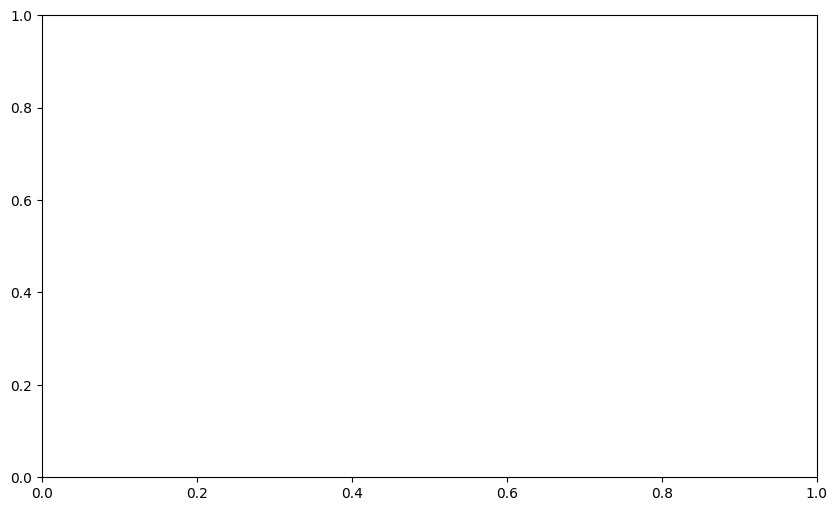

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import imageio
from io import BytesIO

# Crear datos artificiales de clientes
np.random.seed(42)

# Definir 4 perfiles de clientes
estudiantes = np.random.normal(loc=[15, 20, 20], scale=[3, 5, 2], size=(100, 3))  # Van mucho, gastan poco, jóvenes
profesionales = np.random.normal(loc=[6, 80, 35], scale=[2, 10, 5], size=(80, 3))  # Visitan medio, gastan medio, adultos
adultos_mayores = np.random.normal(loc=[2, 15, 65], scale=[1, 5, 3], size=(60, 3)) # Visitan poco, gastan poco, mayores
familias = np.random.normal(loc=[3, 150, 40], scale=[1, 20, 5], size=(60, 3))      # Van poco, gastan alto, edad media

# Unir todos los clientes
X = np.vstack((estudiantes, profesionales, adultos_mayores, familias))

# Crear DataFrame
clientes_df = pd.DataFrame(X, columns=['Frecuencia_Visitas', 'Gasto_Por_Visita', 'Edad'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clientes_df[['Frecuencia_Visitas', 'Gasto_Por_Visita', 'Edad']])

# Inicializar KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=1, max_iter=1)

# Inicializar el gráfico y el objeto de imagenio
fig, ax = plt.subplots(figsize=(10,6))
frames = []

# Capturar el gráfico de cada iteración
def plot_frame(kmeans, X_scaled, frame_list):
    # Predicción de clusters
    y_kmeans = kmeans.predict(X_scaled)
    # Crear gráfico de dispersión
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='Set1', ax=ax)
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=200, color='black', marker='X', ax=ax)
    ax.set_title(f'K-Means Iteration {len(frame_list)}')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    # Guardar como imagen
    byte_io = BytesIO()
    plt.savefig(byte_io, format='png', dpi=80)
    byte_io.seek(0)
    frame_list.append(imageio.imread(byte_io))
    plt.cla()

# Ejecutar K-Means y capturar iteraciones
for _ in range(10):  # 10 iteraciones para el ejemplo
    plot_frame(kmeans, X_scaled, frames)
    kmeans.fit(X_scaled)  # Ajustar KMeans por una iteración

# Crear el GIF
with imageio.get_writer('kmeans_process.gif', mode='I', duration=0.5) as writer:
    for frame in frames:
        writer.append_data(frame)

# Mostrar mensaje de éxito
print("El GIF del proceso de K-Means se ha guardado como 'kmeans_process.gif'.")


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import time
import os

# Crear puntos de datos aleatorios
np.random.seed(0)
X = np.random.rand(300, 2)

# Número de clústers
k = 3

# Inicializar centroides aleatoriamente
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Crear carpeta temporal para guardar los frames
if not os.path.exists('frames'):
    os.makedirs('frames')

# Función para asignar puntos al centroide más cercano
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Función para actualizar los centroides
def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        if np.any(labels == i):
            new_centroids[i] = X[labels == i].mean(axis=0)
        else:
            new_centroids[i] = X[np.random.choice(X.shape[0])]
    return new_centroids

# Guardar frames
filenames = []

fig, ax = plt.subplots()

for iteration in range(10):  # 10 iteraciones
    labels = assign_clusters(X, centroids)
    centroids = update_centroids(X, labels, k)

    ax.clear()
    for i in range(k):
        ax.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
    ax.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
    ax.legend()
    ax.set_title(f'Iteration {iteration + 1}')

    # Guardar imagen temporal
    filename = f'frames/frame_{iteration:02d}.png'
    plt.savefig(filename)
    filenames.append(filename)

    time.sleep(1)  # Pausa para visualizar durante la creación (opcional)

plt.close()

# Crear video MP4
with imageio.get_writer('kmeans.mp4', fps=1) as writer:  # fps=1 significa 1 imagen por segundo
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Eliminar imágenes temporales
for filename in filenames:
    os.remove(filename)

print("Video guardado como 'kmeans.mp4' 🎬")


Video guardado como 'kmeans.mp4' 🎬


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imageio

# 1. Simulamos los datos
np.random.seed(42)
visitas = np.random.randint(1, 20, 100)  # Visitas al centro comercial
gasto = visitas * np.random.uniform(5, 15, 100) + np.random.normal(0, 10, 100)  # Gasto relacionado con visitas
X = np.column_stack((visitas, gasto))

# 2. Inicializamos el GIF
gif_frames = []

# 3. Configurar el KMeans
k = 3
kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=42)

# 4. Ejecutar el KMeans y capturar el proceso manualmente
for i in range(1, 11):
    # Ajustar el modelo solo durante las primeras 10 iteraciones
    kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_

    # Graficar cada paso
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.75, marker='X')
    plt.title(f'Iteración {i}')
    plt.xlabel('Visitas al centro comercial')
    plt.ylabel('Gasto ($)')
    plt.grid(True)
    plt.xlim(0, 22)
    plt.ylim(0, max(gasto)+50)

    plt.savefig(f'frame_{i}.png')
    plt.close()
    gif_frames.append(imageio.imread(f'frame_{i}.png'))

# 5. Guardar el GIF final
imageio.mimsave('kmeans_evolucion.gif', gif_frames, duration=0.8)

print("GIF creado exitosamente.")


<ipython-input-22-2c72aabde170>:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_frames.append(imageio.imread(f'frame_{i}.png'))
<ipython-input-22-2c72aabde170>:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_frames.append(imageio.imread(f'frame_{i}.png'))
<ipython-input-22-2c72aabde170>:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_frames.append(imageio.imread(f'

GIF creado exitosamente.
